In [1]:
from models import *
from sentiment_data import *

import matplotlib.pyplot as plt

train_exs = read_sentiment_examples('data/train.txt')
dev_exs = read_sentiment_examples('data/dev.txt')

log_likelihoods = {}
dev_accuracies = {}

epochs = np.arange(5, 50, 5)
alphas = [1.0, 0.5, 0.1, 'inverse']
colors = ['r', 'g', 'b', 'y']

for alpha in alphas:
  log_likelihoods[alpha] = []
  dev_accuracies[alpha] = []
  
  for num_epochs in epochs:
    lr = train_logistic_regression(train_exs, BetterFeatureExtractor(Indexer()), num_epochs=num_epochs, alpha=alpha)
    log_likelihoods[alpha].append(lr.log_likelihood(train_exs))
    
    accuracy = sum([1.0 if ex.label == lr.predict(ex.words) else 0.0 for ex in dev_exs])/len(dev_exs)
    dev_accuracies[alpha].append(accuracy)

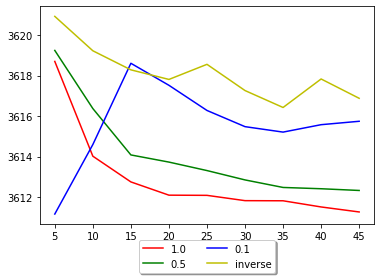

In [2]:
for i in range(len(alphas)):
  plt.plot(epochs, log_likelihoods[alphas[i]], colors[i], label=alphas[i])
  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

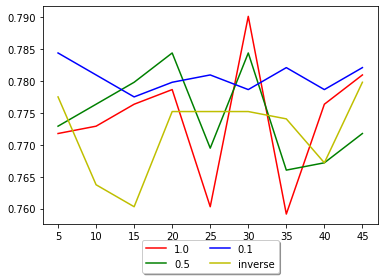

In [3]:
for i in range(len(alphas)):
  plt.plot(epochs, dev_accuracies[alphas[i]], colors[i], label=alphas[i])
  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

In [49]:
from nltk import text

tc = text.TextCollection([ex.words for ex in train_exs])
tc.tf_idf("bronson", ["bronson", "quick", "the"])
tc.idf("not")

import random

random.shuffle(train_exs)

from nltk import classify
from nltk import NaiveBayesClassifier
features = lambda sentence: dict([(word, tc.tf_idf(word, sentence)) for word in sentence])
classifier = NaiveBayesClassifier.train([(features(ex.words), ex.label) for ex in train_exs])

print("Accuracy is:", classify.accuracy(classifier, [(features(ex.words), ex.label) for ex in dev_exs]))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.6112385321100917
Most Informative Features
                      or = 0.12336082482471022      0 : 1      =     10.5 : 1.0
                     n't = 0.162985020180834      0 : 1      =      9.1 : 1.0
                    like = 0.2148114508249364      0 : 1      =      8.4 : 1.0
                       , = 0.08493340291440328      1 : 0      =      8.3 : 1.0
                     too = 0.1556296025959491      0 : 1      =      7.6 : 1.0
                    much = 0.16293980348108789      0 : 1      =      6.9 : 1.0
                      or = 0.11454933733723091      0 : 1      =      6.9 : 1.0
                      or = 0.15273244978297457      0 : 1      =      6.9 : 1.0
                     n't = 0.2607760322893344      0 : 1      =      6.9 : 1.0
                     its = 0.2626290451559051      0 : 1      =      6.9 : 1.0
None


In [50]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}
import random
import nltk

random.shuffle(train_exs)
for name, sklearn_classifier in classifiers.items():
  classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
  classifier.train([(features(ex.words), ex.label) for ex in train_exs])
  accuracy = nltk.classify.accuracy(classifier, [(features(ex.words), ex.label) for ex in dev_exs])
  print(F"{accuracy:.2%} - {name}")



79.47% - BernoulliNB
80.28% - ComplementNB
79.13% - MultinomialNB
58.14% - KNeighborsClassifier
64.11% - DecisionTreeClassifier
72.82% - RandomForestClassifier
77.41% - LogisticRegression
76.72% - MLPClassifier
65.94% - AdaBoostClassifier


In [78]:
from functools import reduce

feats = {}
for ex in train_exs:
  h1 = features(ex.words) 
  for k, v in h1.items():
    feats[k] = v

In [98]:
sorted_feats = sorted(feats.items(), key=lambda k: k[1])
[k for k in sorted_feats if k[1] > 2.5]

[('Cinematic', 2.581186253314535),
 ('Bring', 2.581186253314535),
 ('Extremely', 2.71634128935059),
 ('near-masterpiece', 2.71634128935059),
 ('Deliciously', 2.71634128935059),
 ('Oddly', 2.71634128935059),
 ('tissues', 2.71634128935059),
 ('educational', 2.71634128935059),
 ('Amazingly', 2.71634128935059),
 ('Psychologically', 2.71634128935059),
 ('Predictably', 2.71634128935059),
 ('Incoherence', 2.9473903495372387),
 ('reigns', 2.9473903495372387),
 ('Compellingly', 2.9473903495372387),
 ('Painfully', 2.9473903495372387),
 ('freak-out', 2.9473903495372387),
 ('Feeble', 2.9473903495372387),
 ('Disjointed', 2.9473903495372387),
 ('One-of-a-kind', 2.9473903495372387),
 ('occasion', 2.9473903495372387),
 ('Unwieldy', 2.9473903495372387),
 ('contraption', 2.9473903495372387),
 ('Bravado', 2.9473903495372387),
 ('Insanely', 2.9473903495372387),
 ('Rashomon-for-dipsticks', 2.9473903495372387),
 ('no.', 2.9473903495372387),
 ('Quietly', 2.9473903495372387),
 ('Genuinely', 2.9473903495372387